# Submission Pertama: Menyelesaikan Permasalahan Human Resources

- Nama: Hafiizh Taufiqul Hakim
- Email: 2012500720@student.budiluhur.ac.id
- Id Dicoding: hafizhtaufiqul1002

# Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [2]:
dataset = "https://raw.githubusercontent.com/HafiizhTH/Attrition-Prediction/main/Data/Data_to_Visualisasi.csv"

In [3]:
df = pd.read_csv(dataset)
df.head().T

,0,1,2,3,4
Age,36-40,> 60,41-45,36-40,> 60
Attrition,Karyawan Keluar,Karyawan Keluar,Karyawan Beratahan,Karyawan Beratahan,Karyawan Keluar
BusinessTravel,Travel_Rarely,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Rarely
DailyRate,1141,1323,555,1124,725
Department,Research & Development,Research & Development,Sales,Sales,Research & Development
DistanceFromHome,11-15 km,0-5 km,> 20 km,0-5 km,0-5 km
Education,College,Master,Bachelor,College,Bachelor
EducationField,Medical,Life Sciences,Marketing,Medical,Medical
EnvironmentSatisfaction,Low,Low,High,Medium,Very High
Gender,Female,Male,Female,Male,Male


# EDA

### Statistik Deskriptif

In [4]:
num = df.select_dtypes(exclude='object').columns
cat = df.select_dtypes(include='object').columns

In [5]:
# Statistik deskriptif untuk data numerik
df[num].describe()

,DailyRate,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,TotalWorkingYears,TrainingTimesLastYear,YearsInCurrentRole,YearsSinceLastPromotion
count,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.00000,1058.000000
mean,809.542533,65.643667,6625.945180,14267.281664,2.706994,11.435728,2.769376,4.26087,2.203214
std,408.478049,20.324861,4837.695042,7048.077305,2.523526,8.016429,1.302689,3.61747,3.266948
min,102.000000,30.000000,1009.000000,2094.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,465.250000,48.000000,2900.250000,8277.250000,1.000000,6.000000,2.000000,2.00000,0.000000
50%,817.500000,65.000000,4903.500000,14201.000000,2.000000,10.000000,3.000000,3.00000,1.000000
75%,1168.500000,83.000000,8736.500000,20364.000000,4.000000,16.000000,3.000000,7.00000,3.000000
max,1499.000000,100.000000,19999.000000,26999.000000,9.000000,40.000000,6.000000,18.00000,15.000000


In [6]:
# Statistik deskriptif untuk data kategorik
df[cat].describe()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,JobSatisfaction,MaritalStatus,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance,YearsAtCompany,YearsWithCurrManager
count,1058,1058,1058,1058,1058,1058,1058,1058,1058,1058,...,1058,1058,1058,1058,1058,1058,1058,1058,1058,1058
unique,7,2,3,3,5,5,6,4,2,4,...,4,3,2,3,2,4,4,4,4,3
top,31-35,Karyawan Beratahan,Travel_Rarely,Research & Development,0-5 km,Bachelor,Life Sciences,High,Male,High,...,Very High,Married,No,< 15%,High,High,Very High,Excellent,0-5 years,0-5 years
freq,239,879,746,701,467,410,436,335,620,625,...,340,464,751,665,899,324,471,638,553,684


### Univariate Analysis

##### Fitur Numerik

In [7]:
# Mengidentifikasi untuk kolom numerik
num_plots = len(num)
num_rows = (num_plots // 3) + 1
num_cols = 3

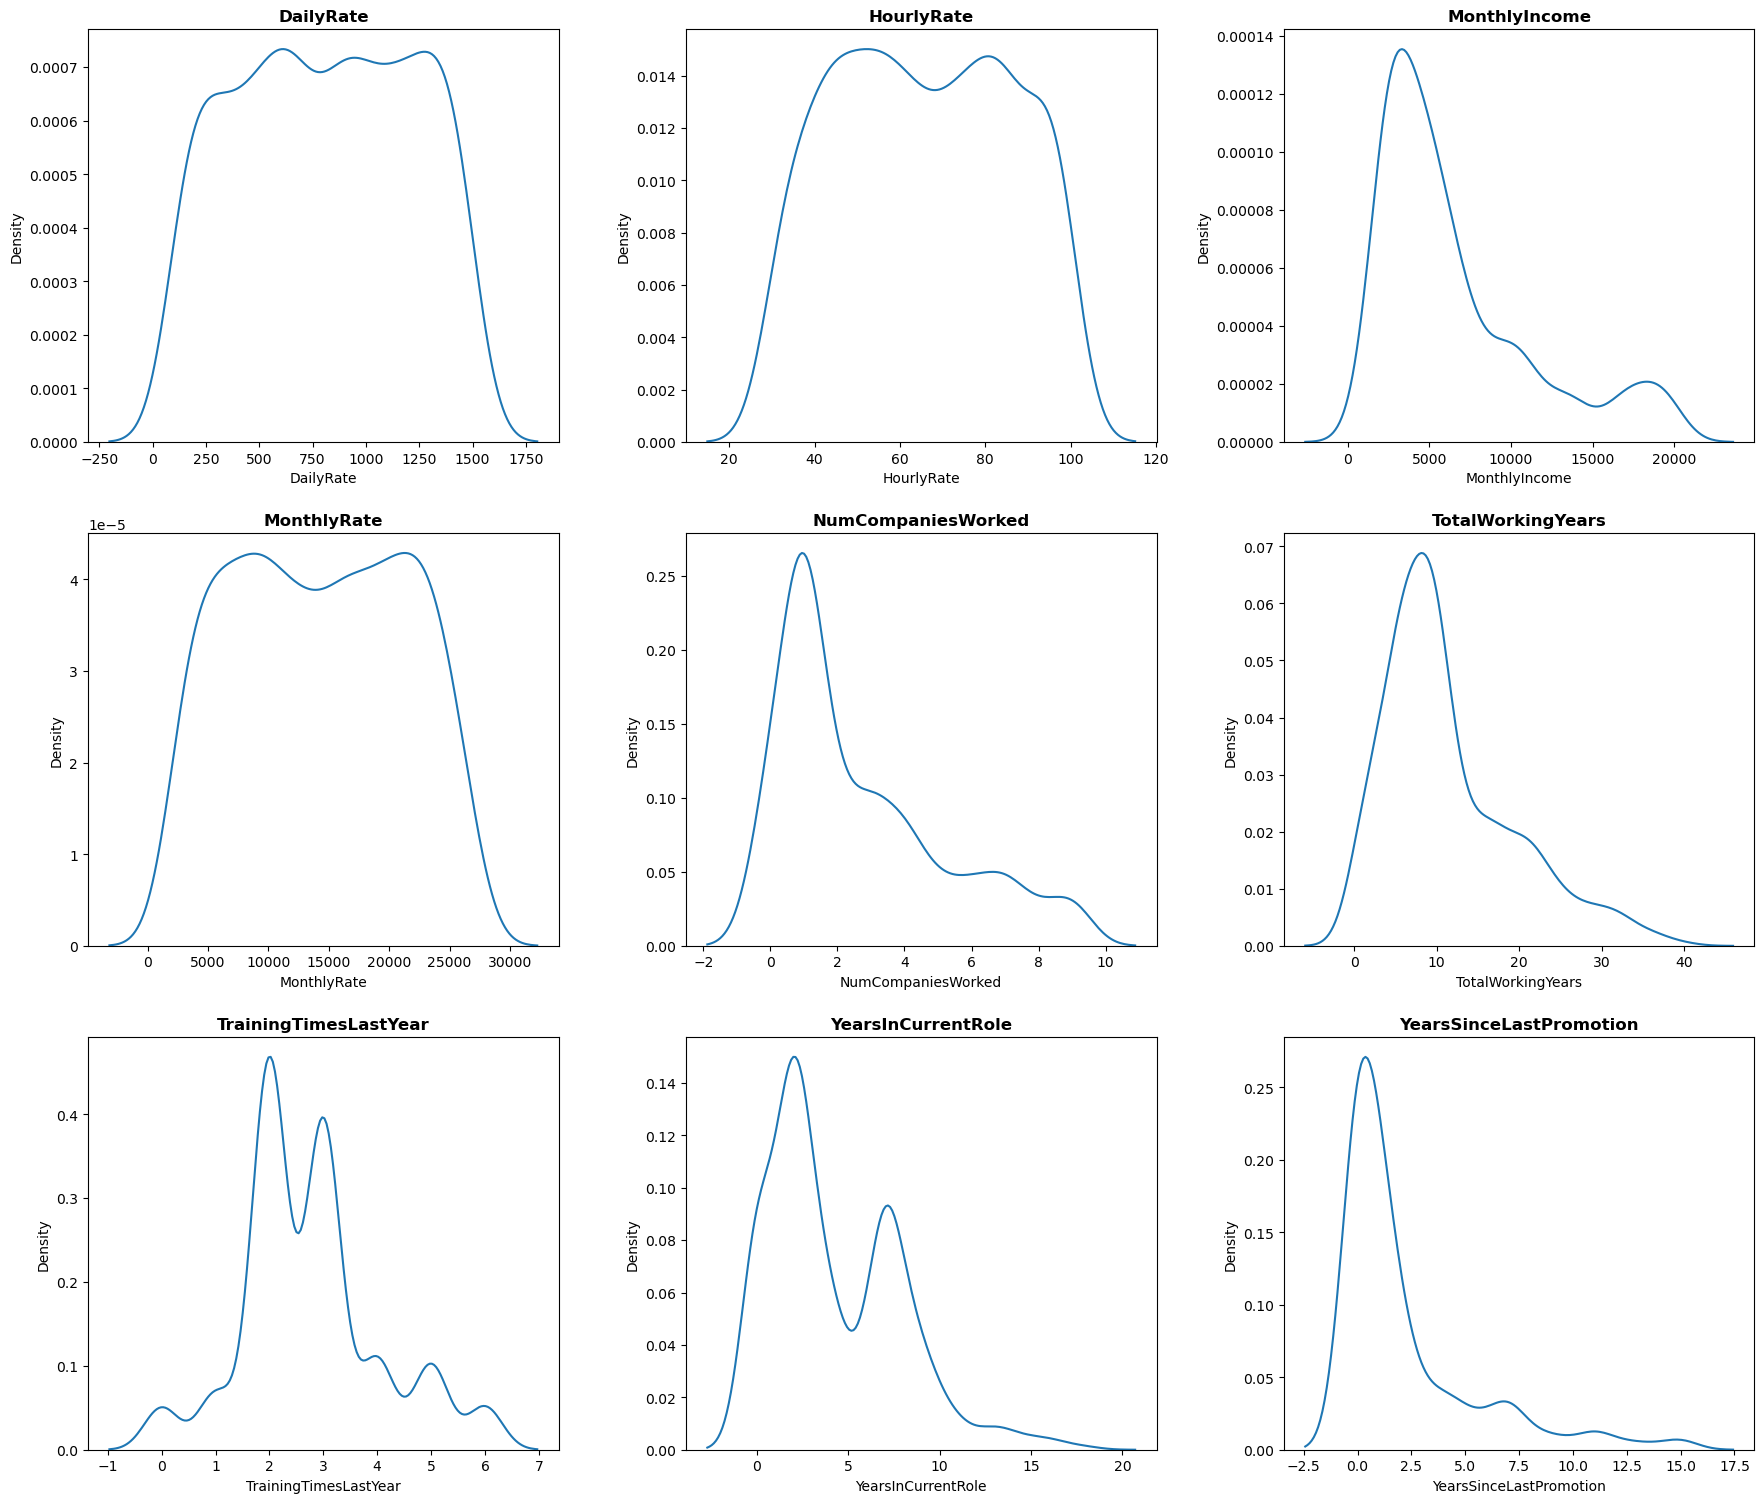

In [8]:
# Kde
rcParams['figure.figsize'] = 18, 5 * num_rows
for i in range(0, len(num)):
    plt.subplot(num_rows, num_cols, i+1)
    sns.kdeplot(x=df[num[i]], palette='#4793AF')
    plt.title(num[i], fontsize=12, fontweight='bold')
    plt.tight_layout(pad=2)
plt.show()

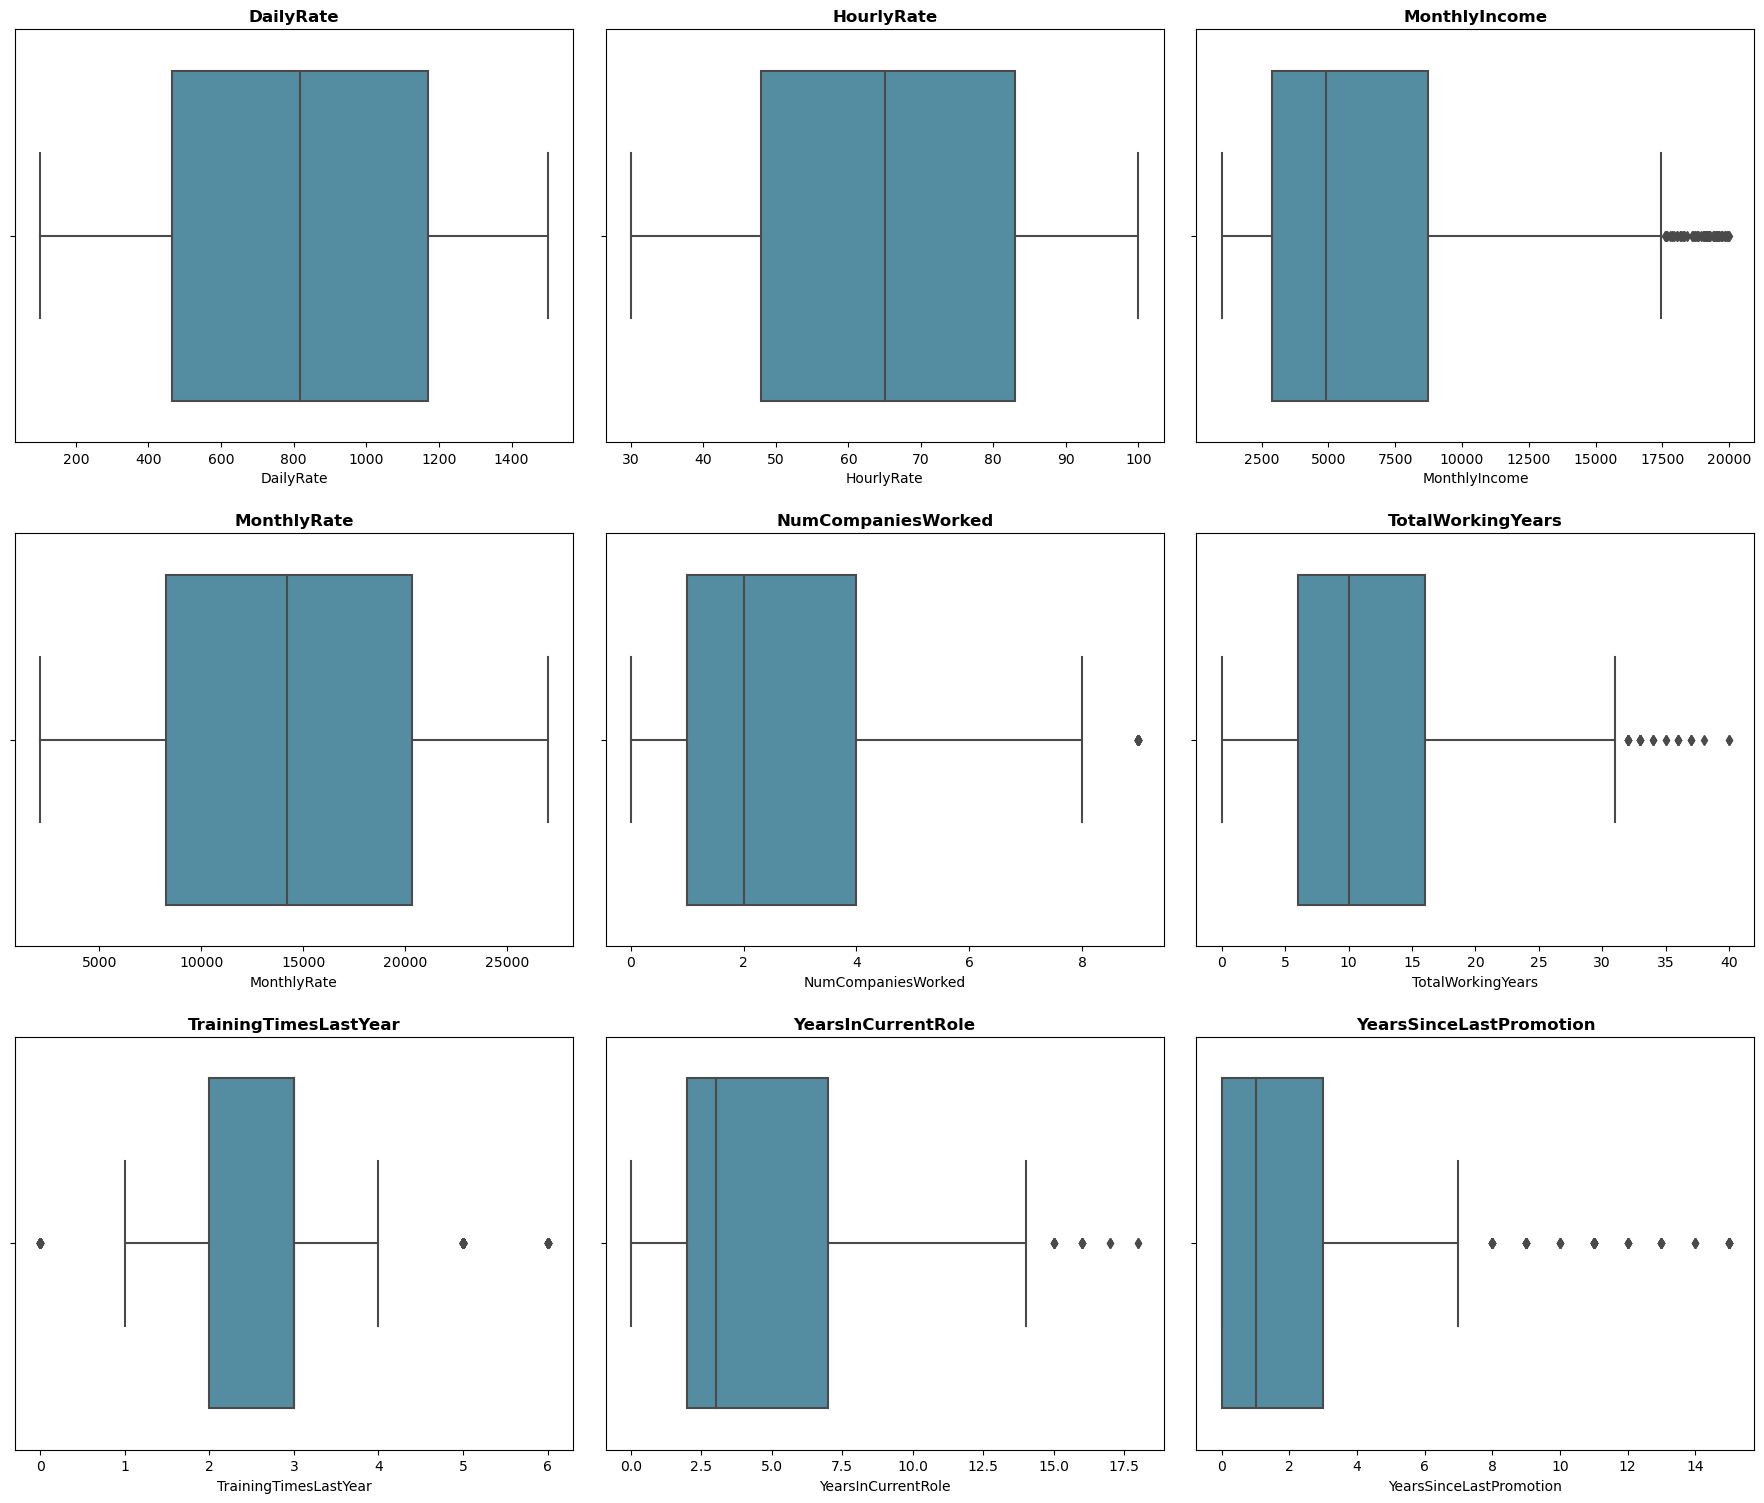

In [9]:
# Boxplot
rcParams['figure.figsize'] = 18, 5 * num_rows
for i in range(0, len(num)):
    plt.subplot(num_rows, num_cols, i+1)
    sns.boxplot(x=df[num[i]], color='#4793AF')
    plt.title(num[i], fontsize=12, fontweight='bold')
    plt.tight_layout(pad=2)
plt.show()

##### Fitur Kategorik

In [10]:
# Mengidentifikasi untuk kolom kategorik
cat_plots = len(cat)
cat_rows = (cat_plots // 2) + 1
cat_cols = 2

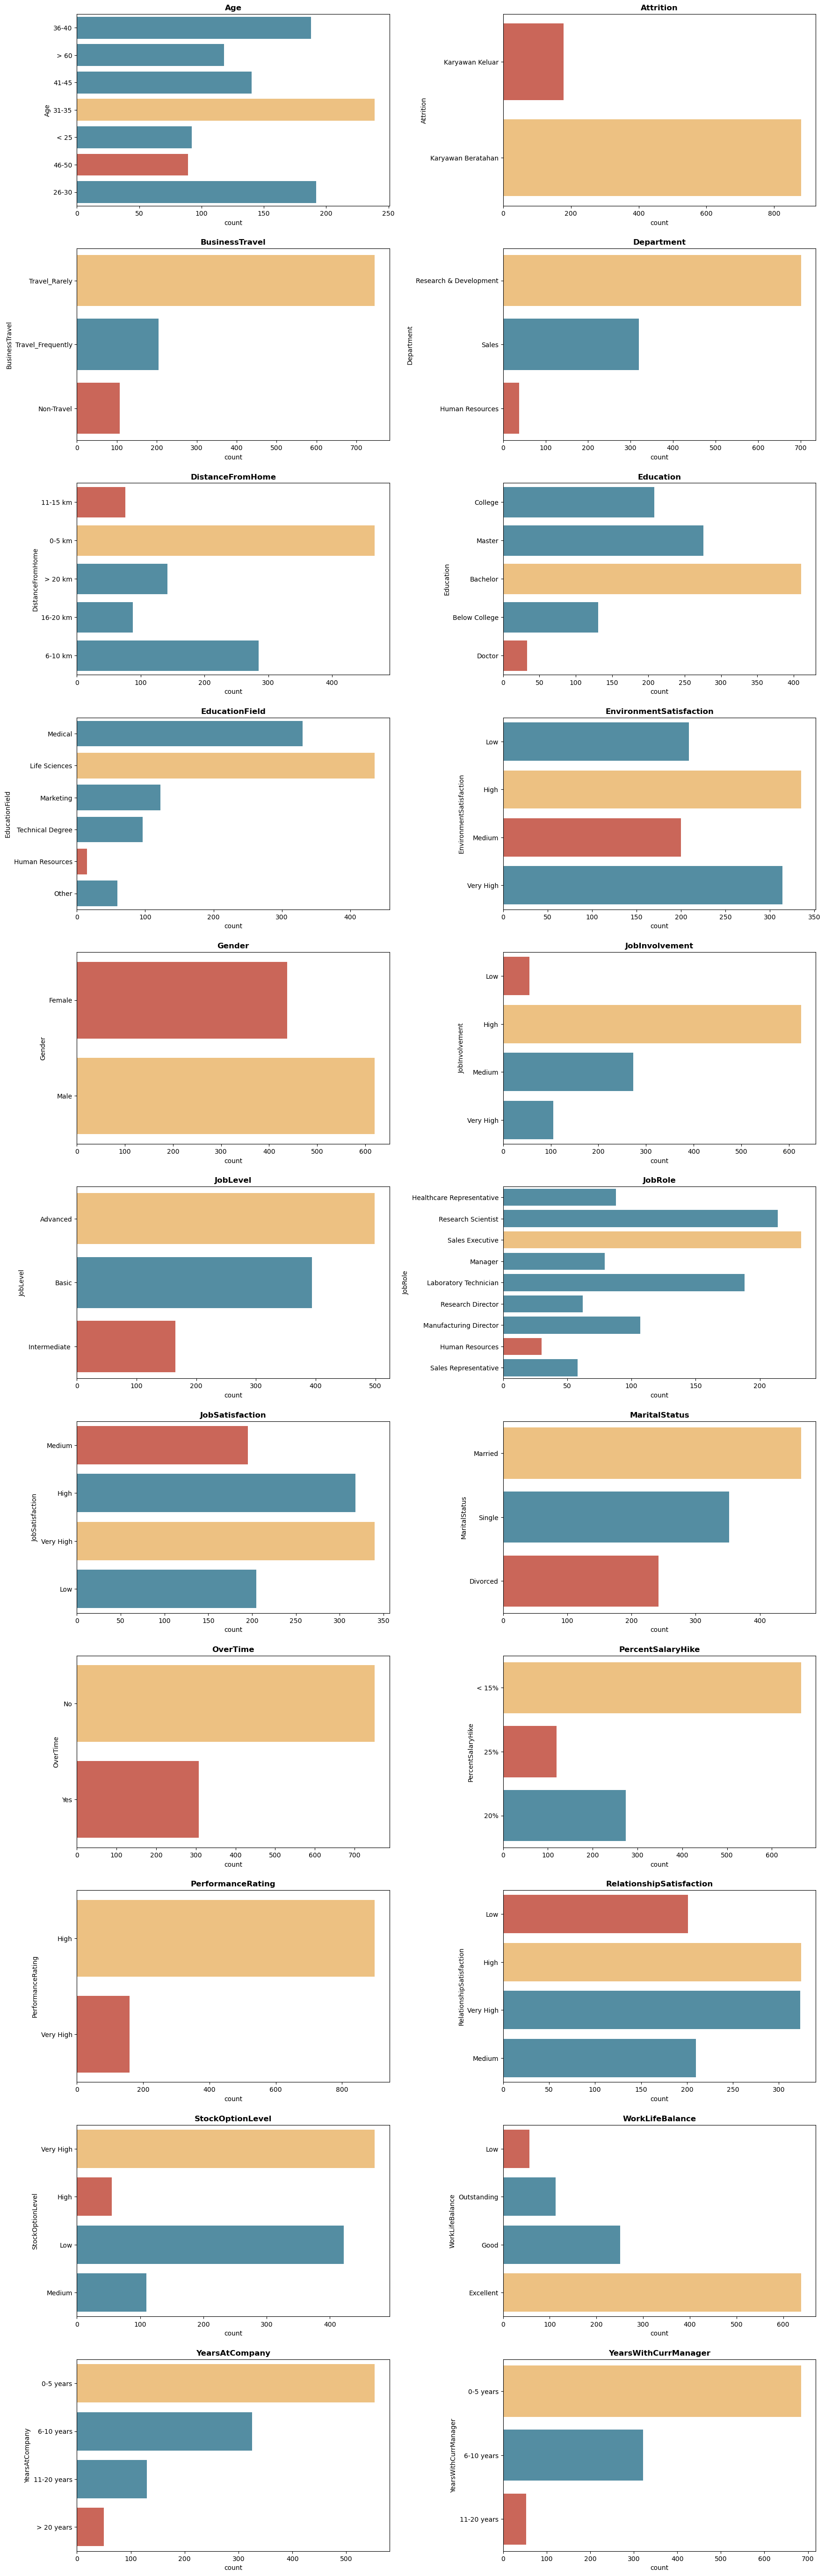

In [11]:
def generate_palette(series):
    max_val = series.value_counts().idxmax()
    min_val = series.value_counts().idxmin()
    colors = ['#DD5746' if val == min_val else '#FFC470' if val == max_val else '#4793AF' for val in series.unique()]
    return dict(zip(series.unique(), colors))

rcParams['figure.figsize'] = 18, 5 * cat_rows
for i in range(0, len(cat)):
    plt.subplot(cat_rows, cat_cols, i+1)
    palette = generate_palette(df[cat[i]])
    sns.countplot(y=df[cat[i]], palette=palette)
    plt.title(cat[i], fontweight='bold')
    plt.tight_layout(pad=2)
plt.show()

### Bivariate Analysis

In [12]:
# Membuat sebuah helper function bernama categorical_plot
def categorical_plot(features, df, segment_feature=None):
    fig, ax = plt.subplots(len(features), 1,figsize=(16,20))
    for i, feature in enumerate(features):
        if segment_feature:
            sns.countplot(data=df, x=segment_feature, hue=feature, ax=ax[i])
            ax[i].set_title(f'Grafik {feature} berdasarkan {segment_feature}', fontsize = 14, fontweight='bold')
            ax[i].set_xlabel(segment_feature, fontsize = 10)
        else:
            sns.countplot(data=df, x=feature, ax=ax[i])
    plt.tight_layout()
    plt.show()

In [13]:
# Membuat sebuah helper function bernama numerical_plot
def numerical_plot(features, df, segment_feature=None):
    fig, ax = plt.subplots(len(features), 1,figsize=(16,20))
    for i, feature in enumerate(features):
        if segment_feature:
            sns.countplot(data=df, x=feature, hue=segment_feature, ax=ax[i])
            ax[i].set_title(f'Grafik {feature} berdasarkan {segment_feature}', fontsize = 14, fontweight='bold')
            ax[i].set_xlabel(segment_feature, fontsize = 10)
        else:
            sns.countplot(data=df, x=feature, ax=ax[i])
    plt.tight_layout()
    plt.show()

##### Hubungan Fitur Numerik dengan Fitur Attrition

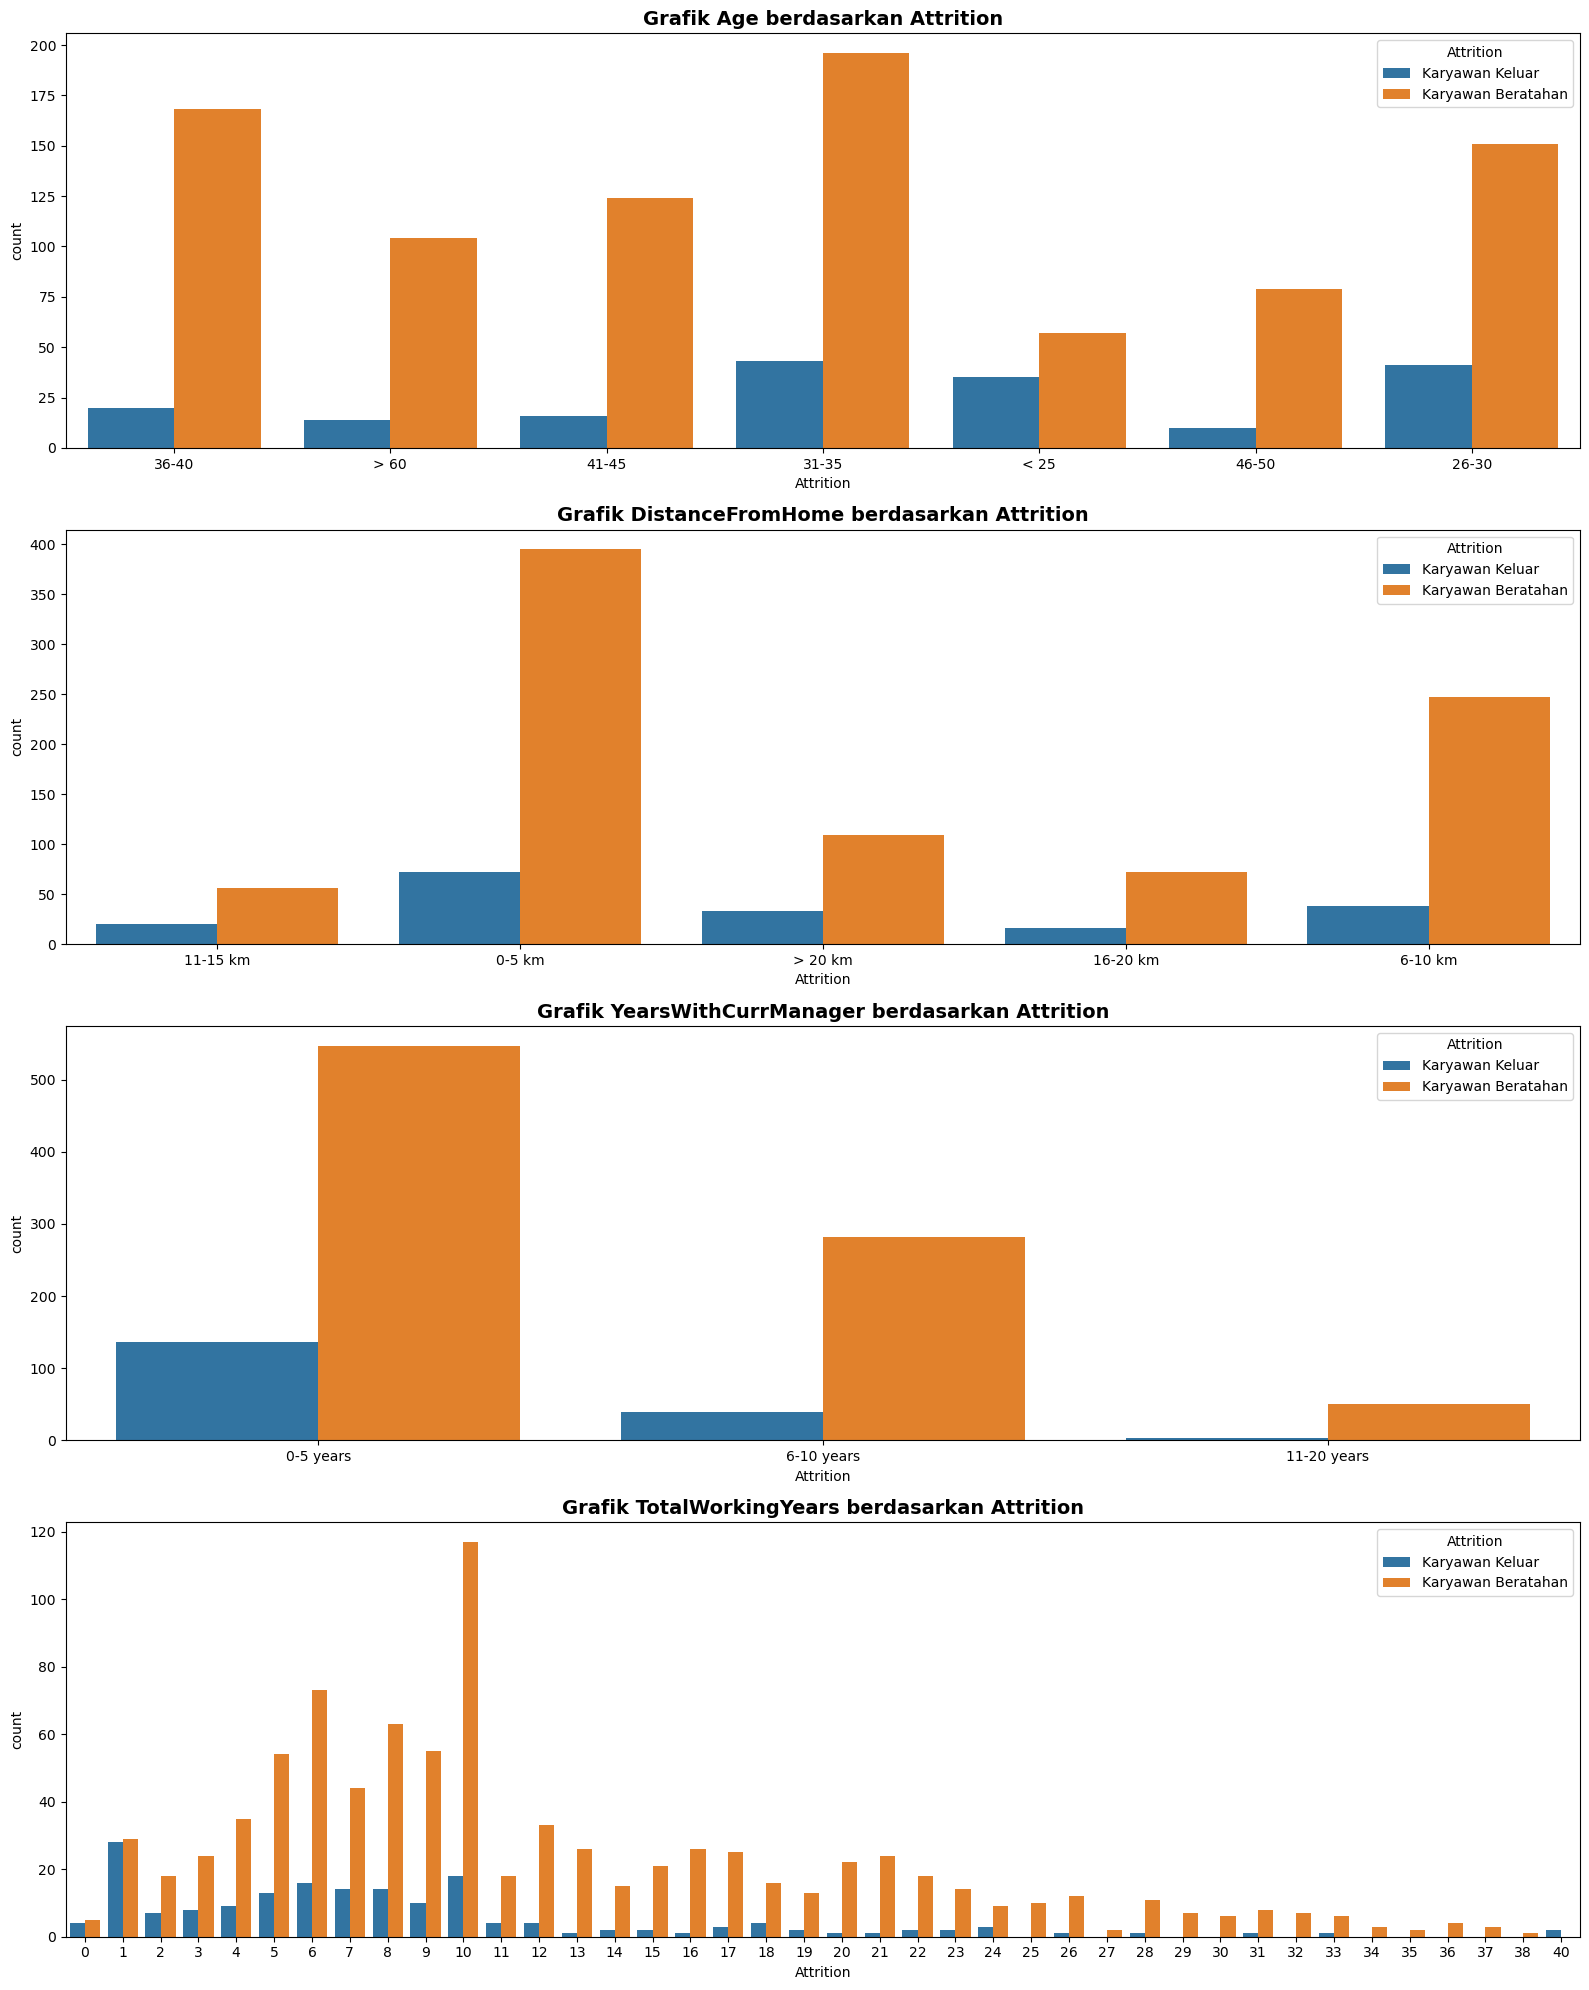

In [14]:
numerical_plot(
    features=["Age", "DistanceFromHome", "YearsWithCurrManager", "TotalWorkingYears"],
    df=df,
    segment_feature="Attrition"
)

**Obervasi:**   
Teks

##### Hubungan Fitur Kategorik dengan Fitur JobRole

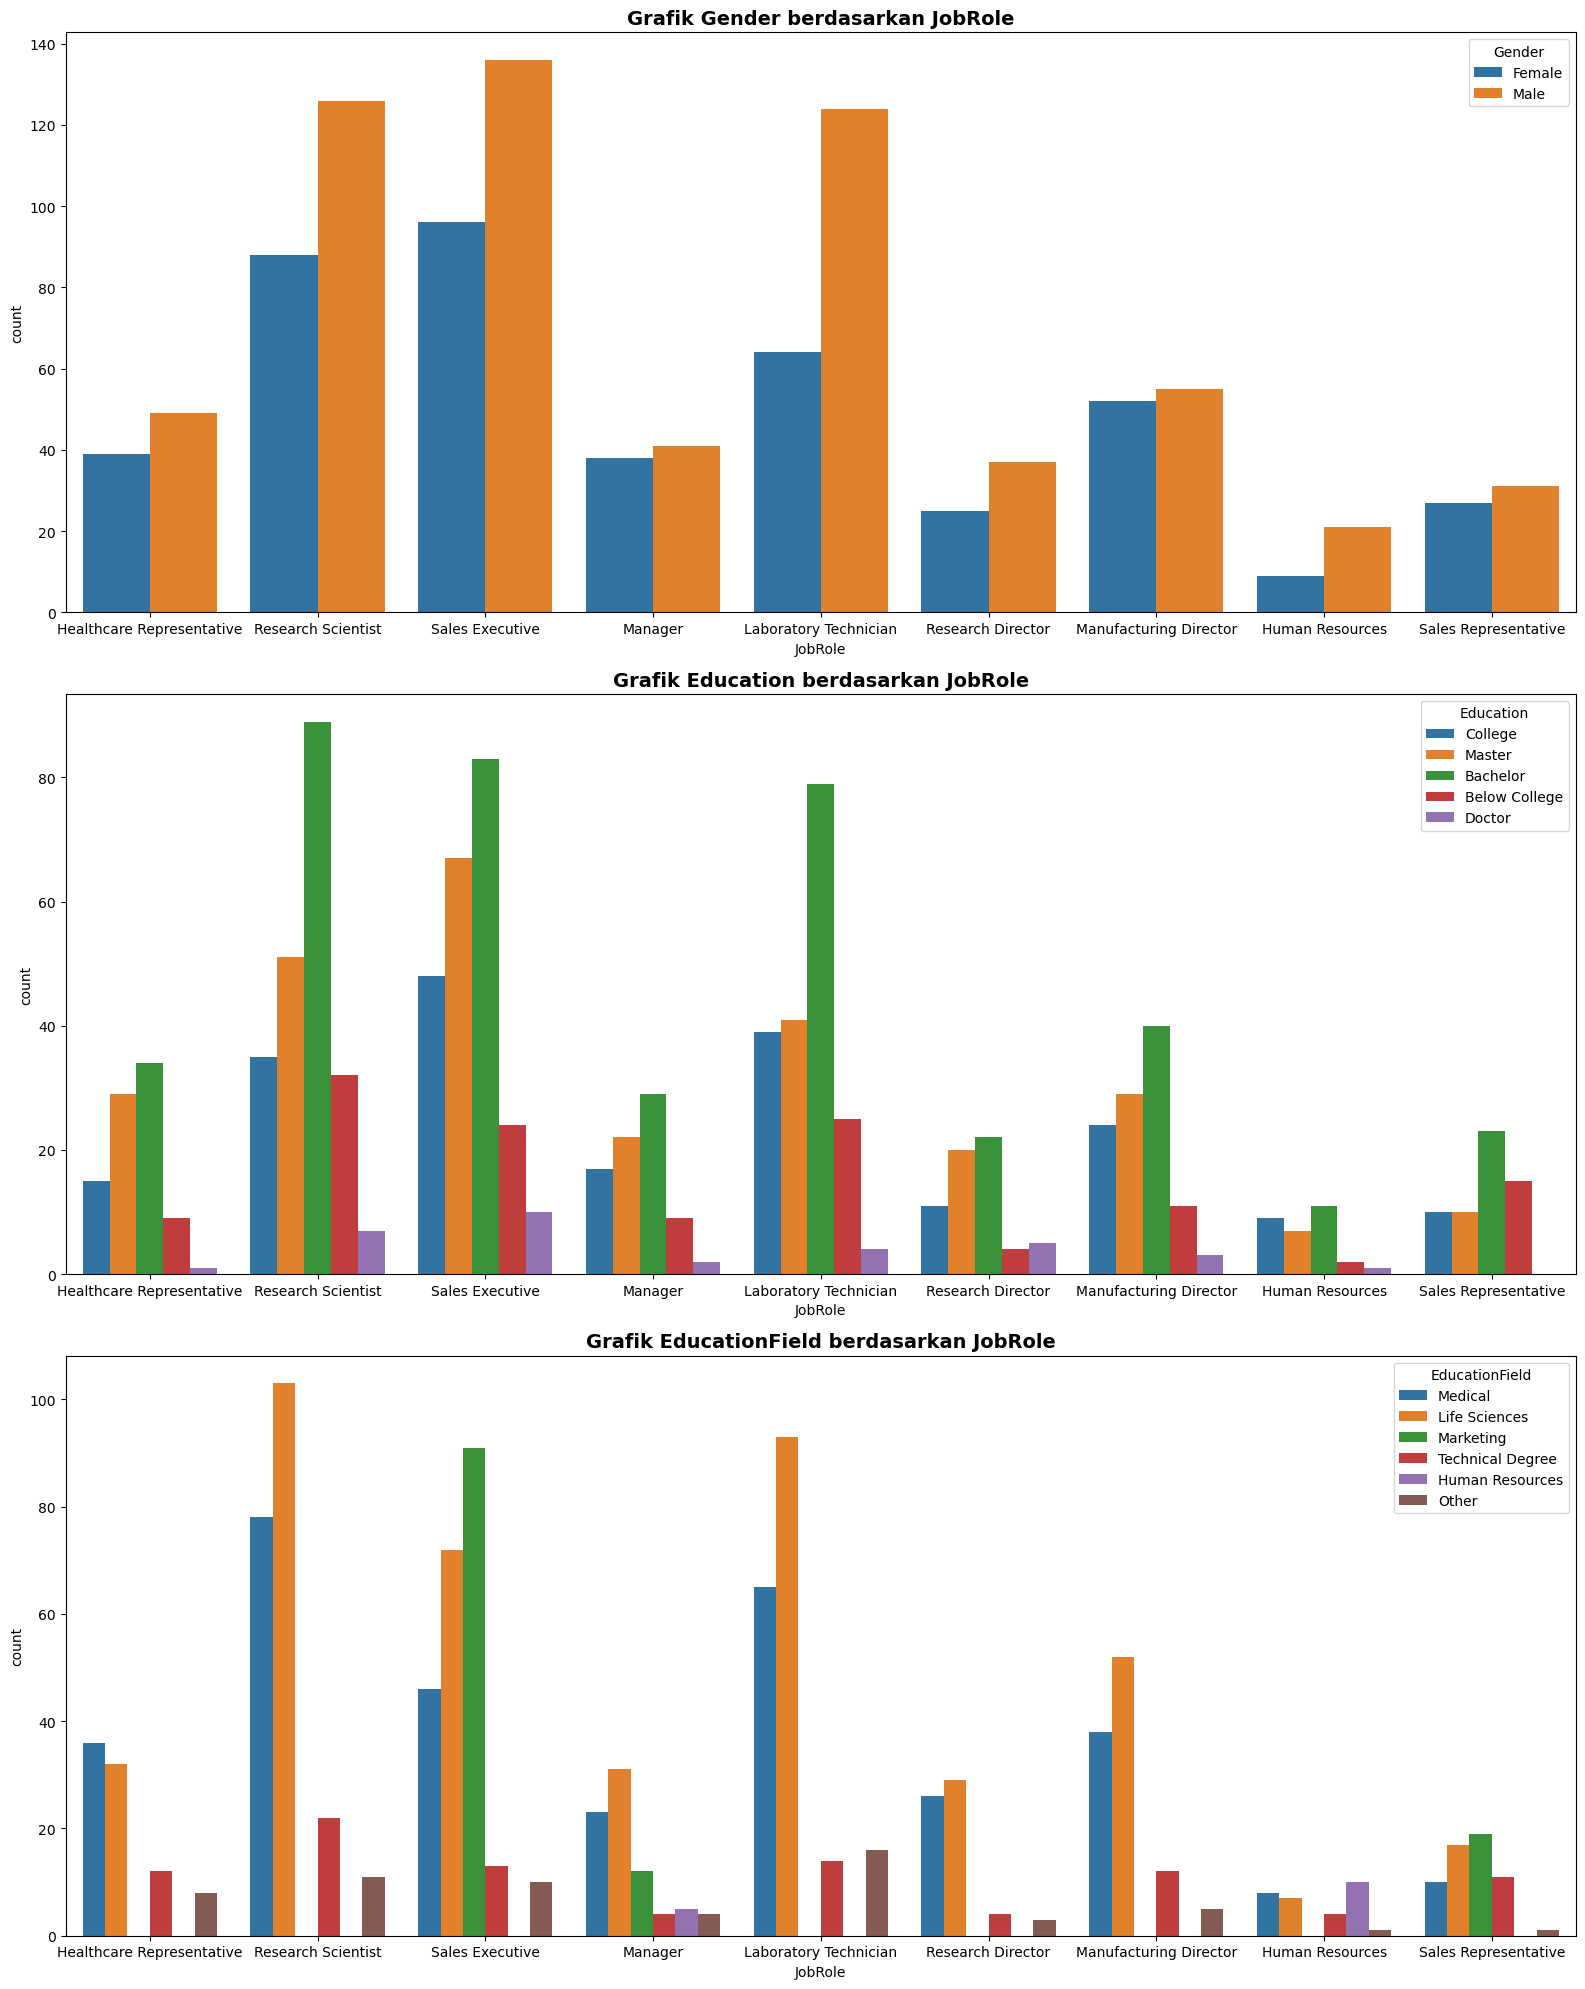

In [15]:
categorical_plot(
    features=["Gender", "Education", "EducationField"],
    df=df,
    segment_feature="JobRole"
)

**Obervasi:**   
Teks

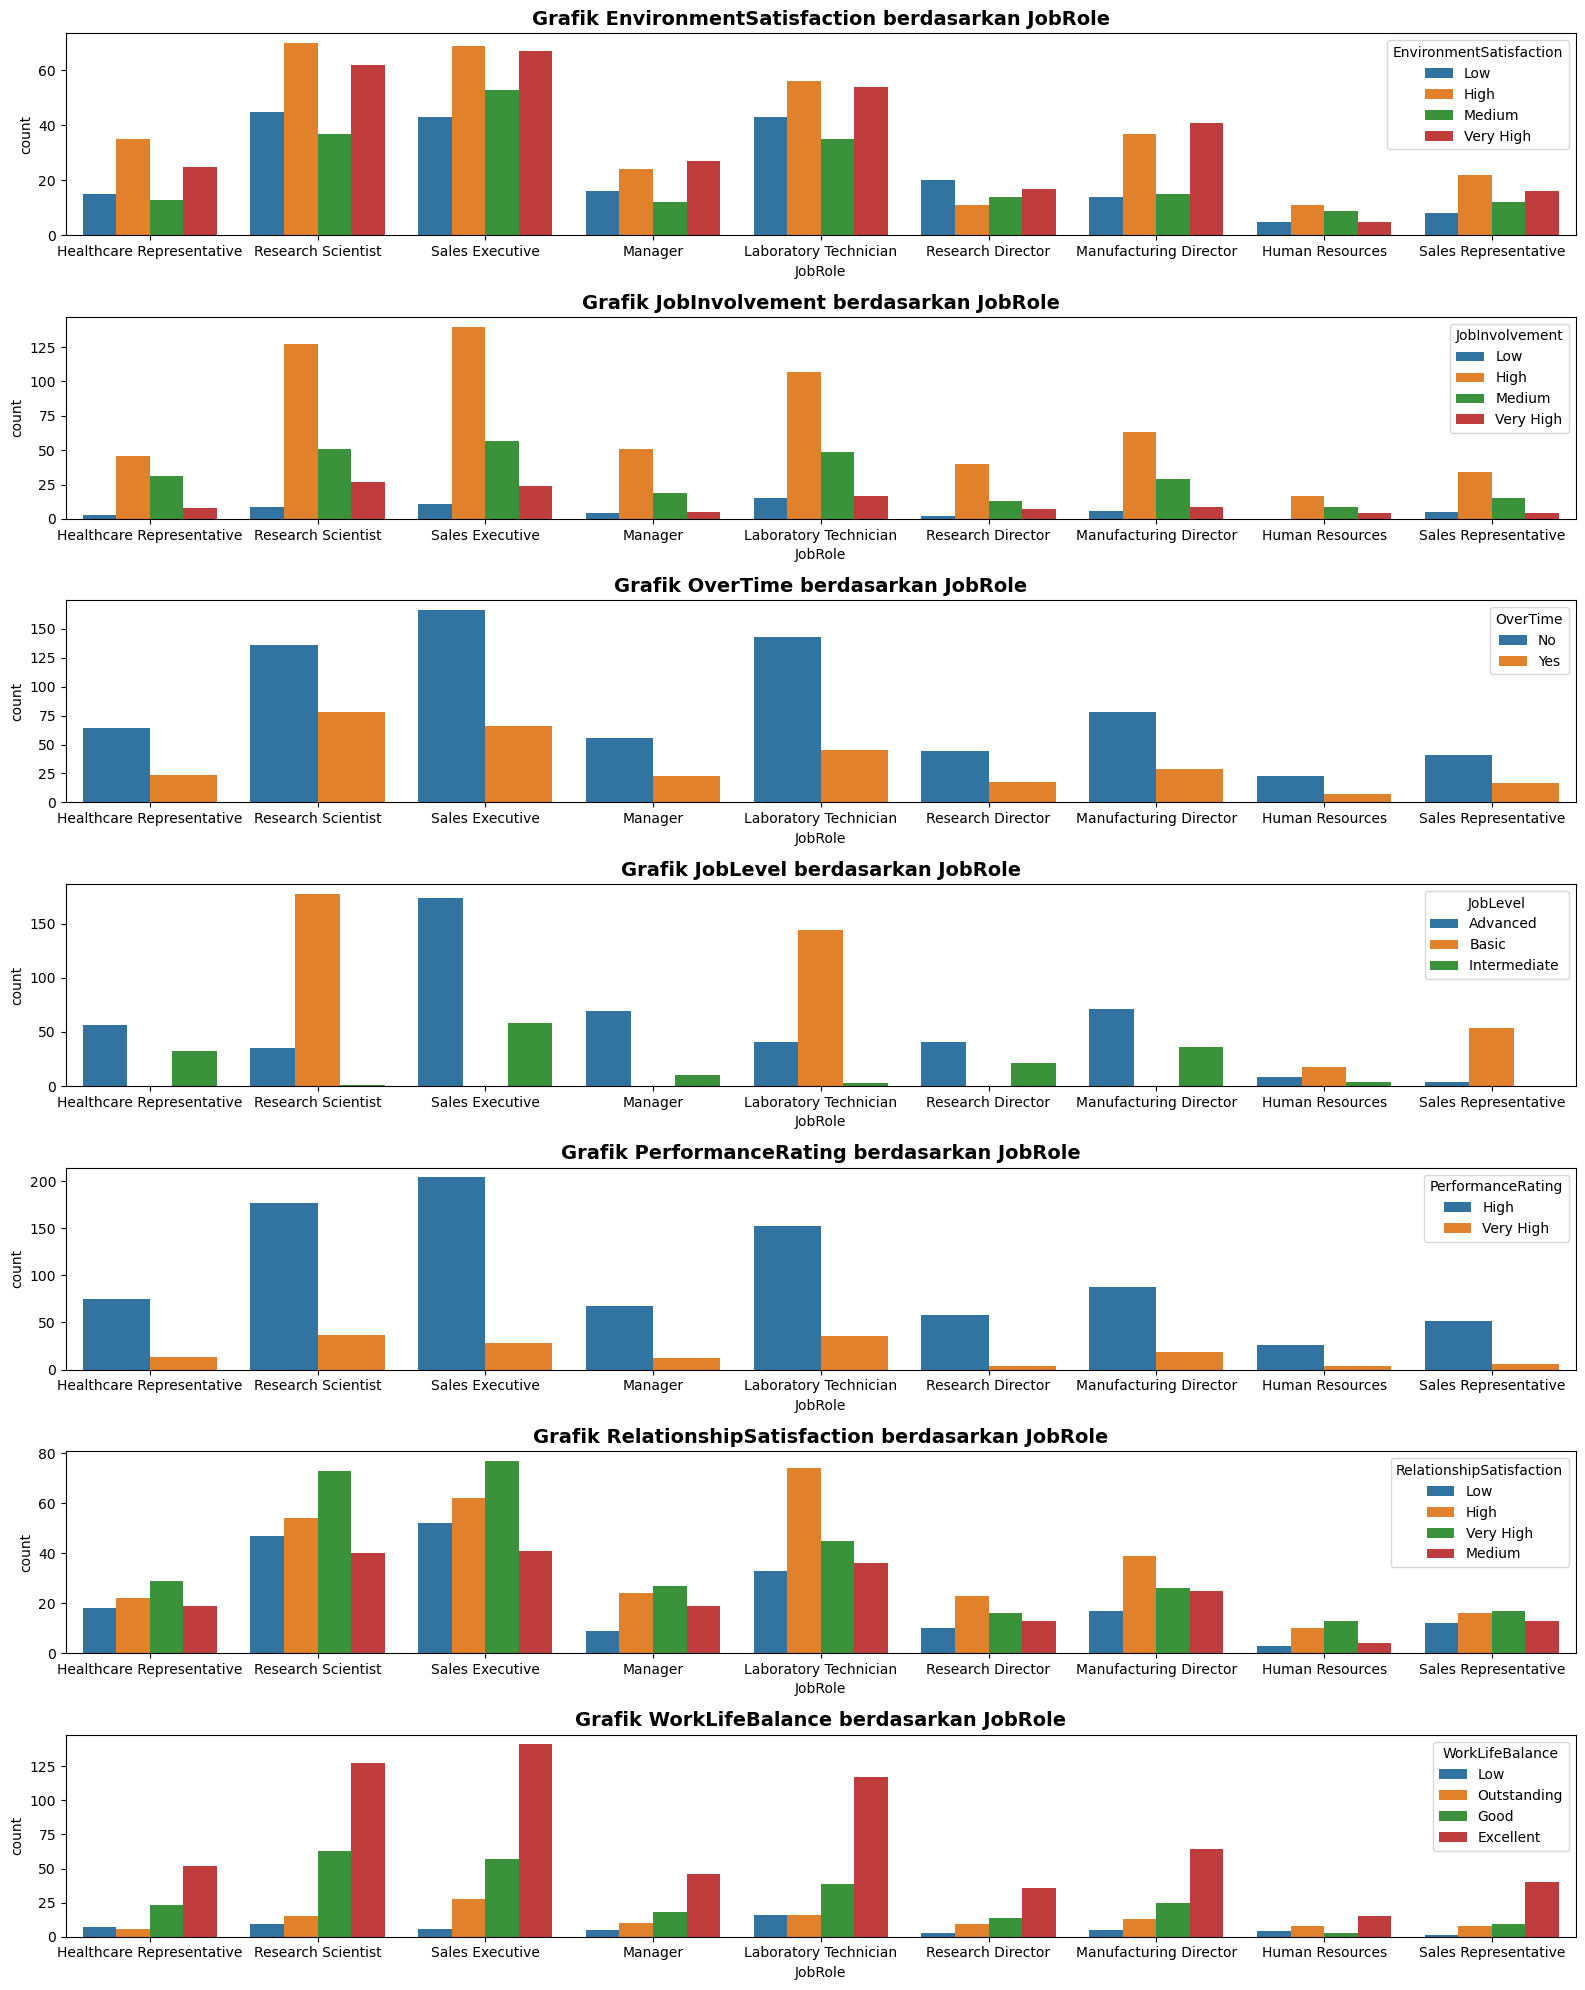

In [16]:
categorical_plot(
    features=["EnvironmentSatisfaction", "JobInvolvement", "OverTime", "JobLevel",
              "PerformanceRating", "RelationshipSatisfaction", "WorkLifeBalance"],
    df=df,
    segment_feature="JobRole"
)

**Obervasi:**   
Teks

##### Hubungan Fitur kategorik dengan Fitur Department

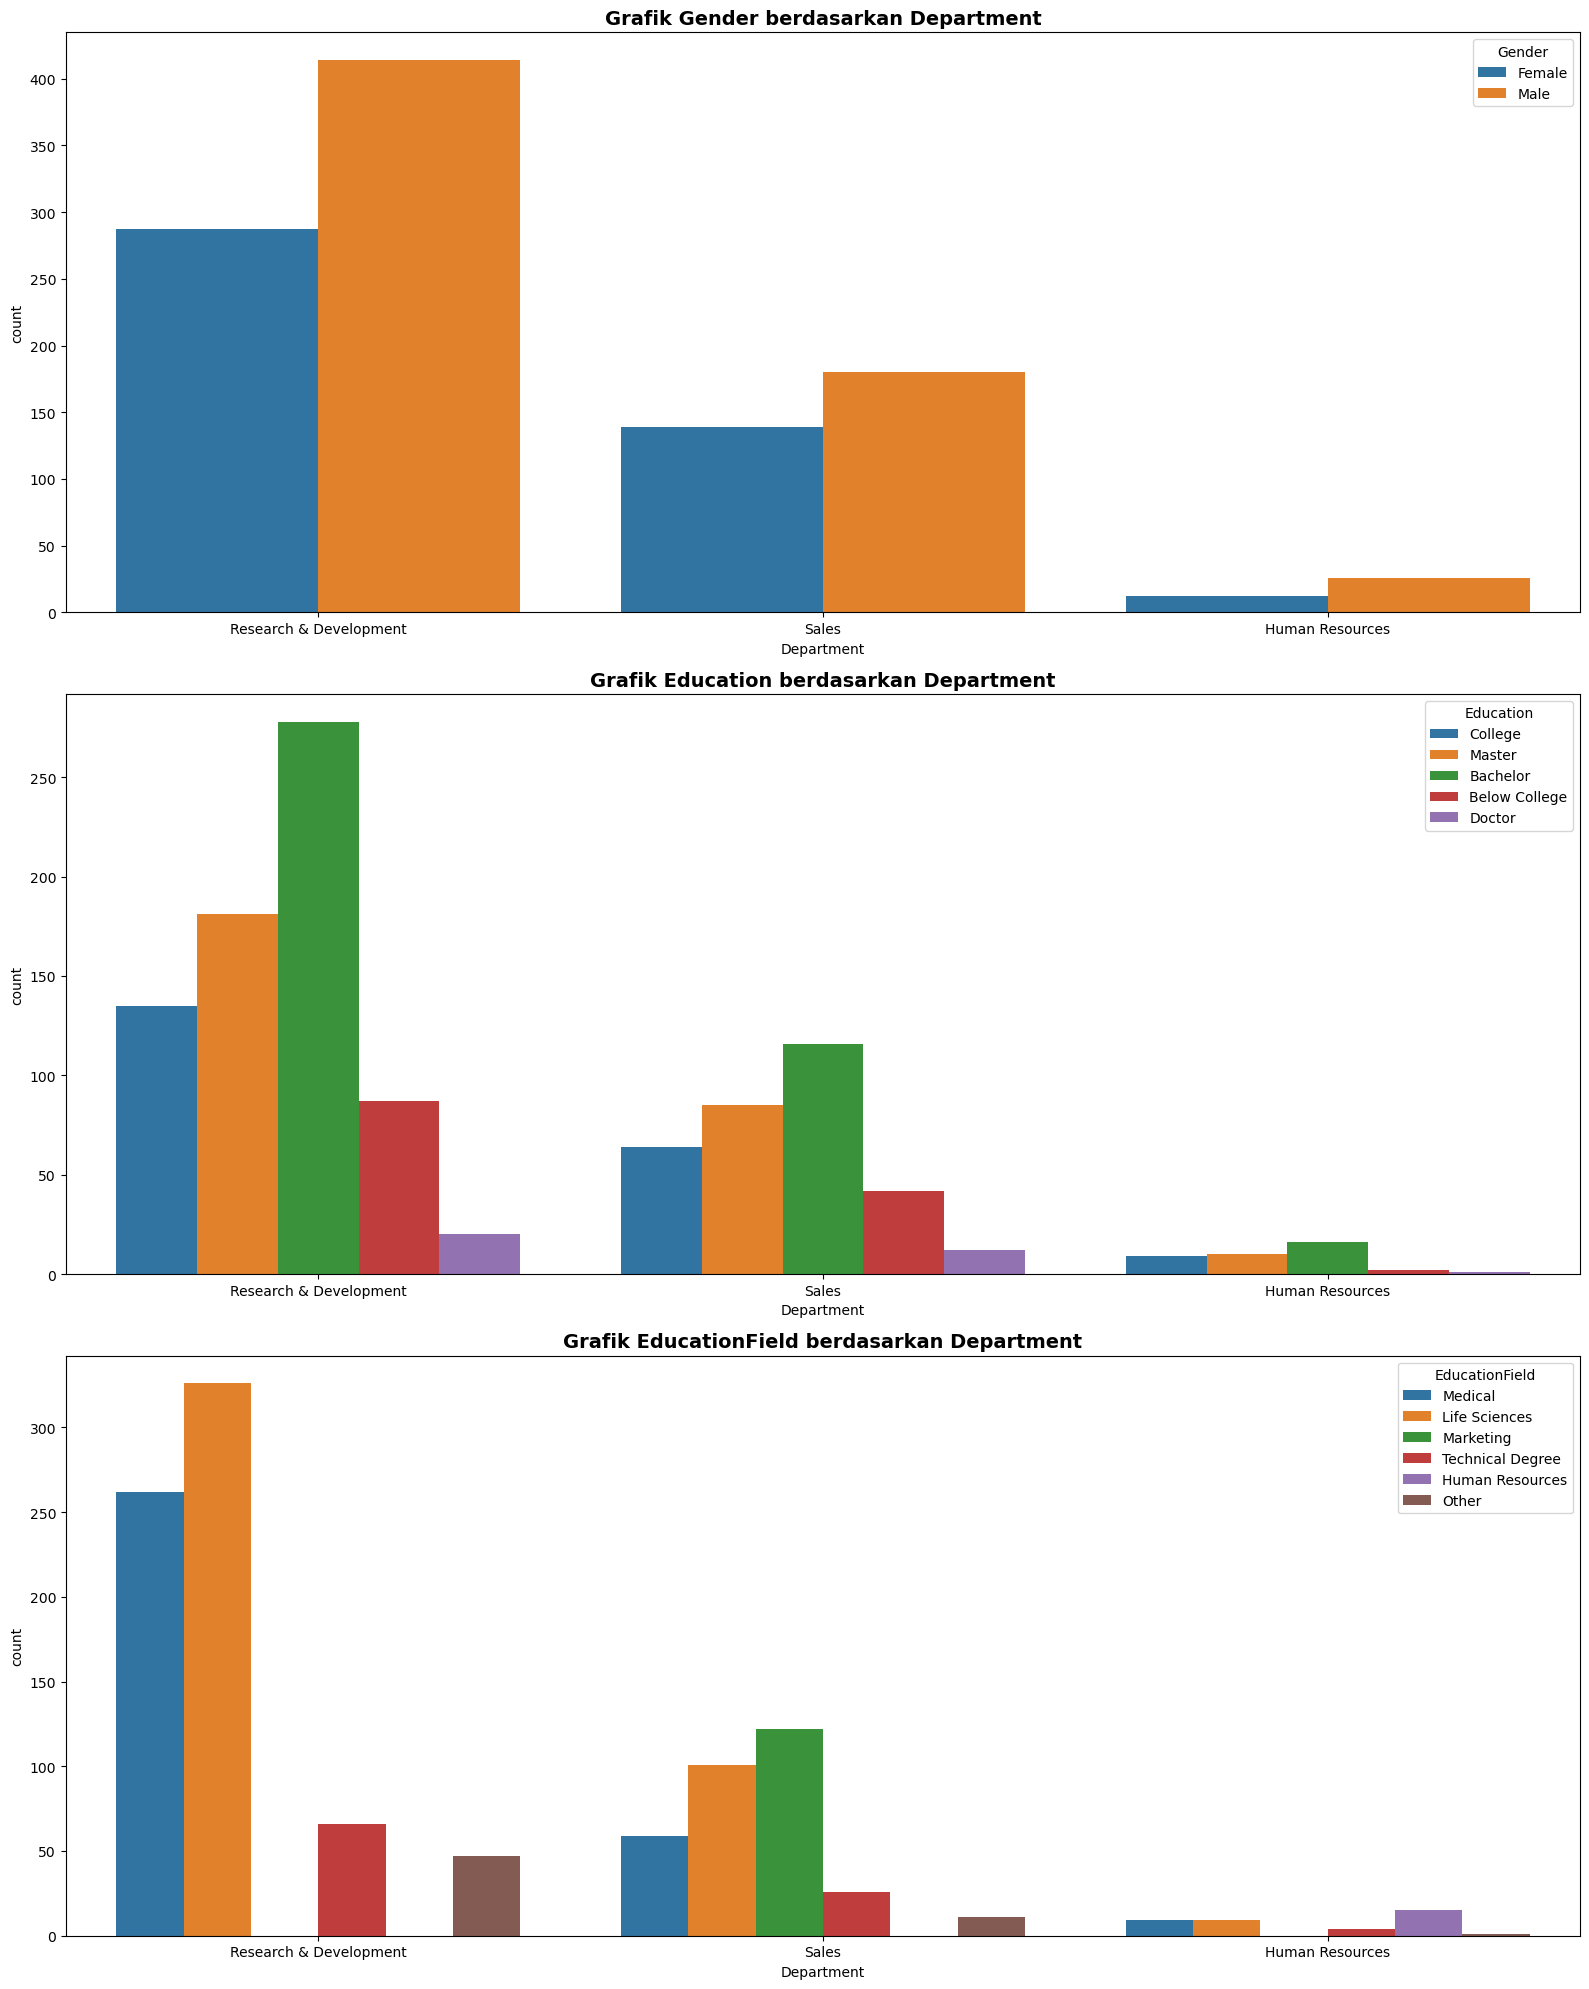

In [17]:
categorical_plot(
    features=["Gender", "Education", "EducationField"],
    df=df,
    segment_feature="Department"
)

**Obervasi:**   
Teks

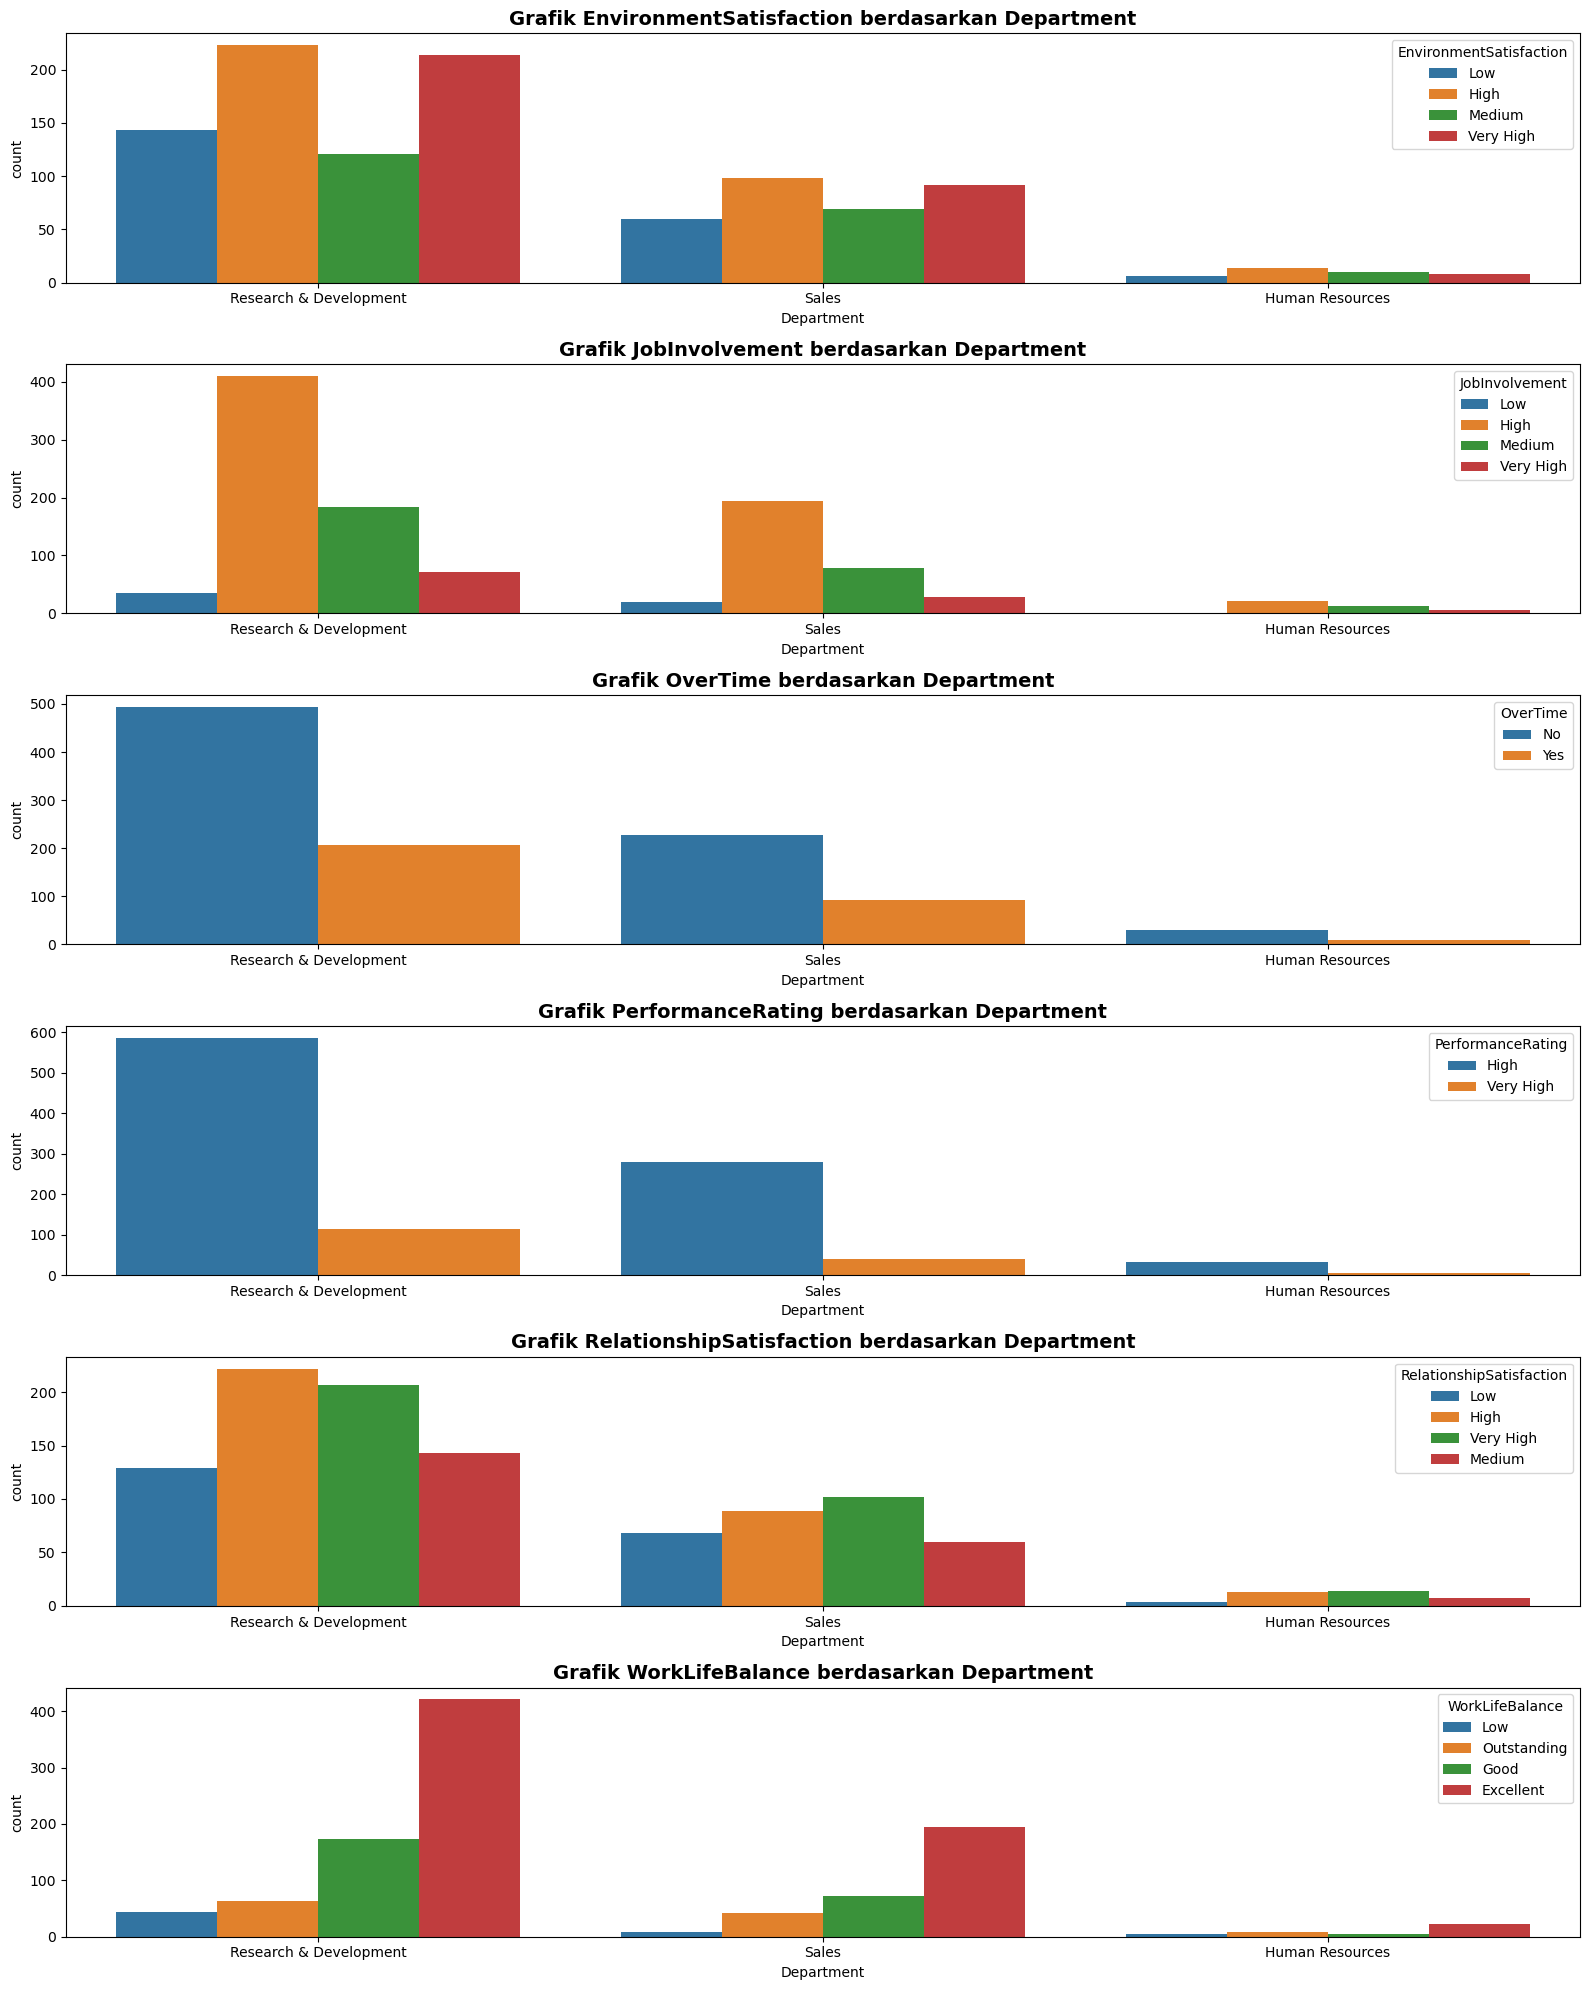

In [18]:
categorical_plot(
    features=["EnvironmentSatisfaction", "JobInvolvement", "OverTime",
              "PerformanceRating", "RelationshipSatisfaction", "WorkLifeBalance"],
    df=df,
    segment_feature="Department"
)

**Obervasi:**   
Teks

##### Hubungan Fitur Kategorik dengan Fitur Business Travel

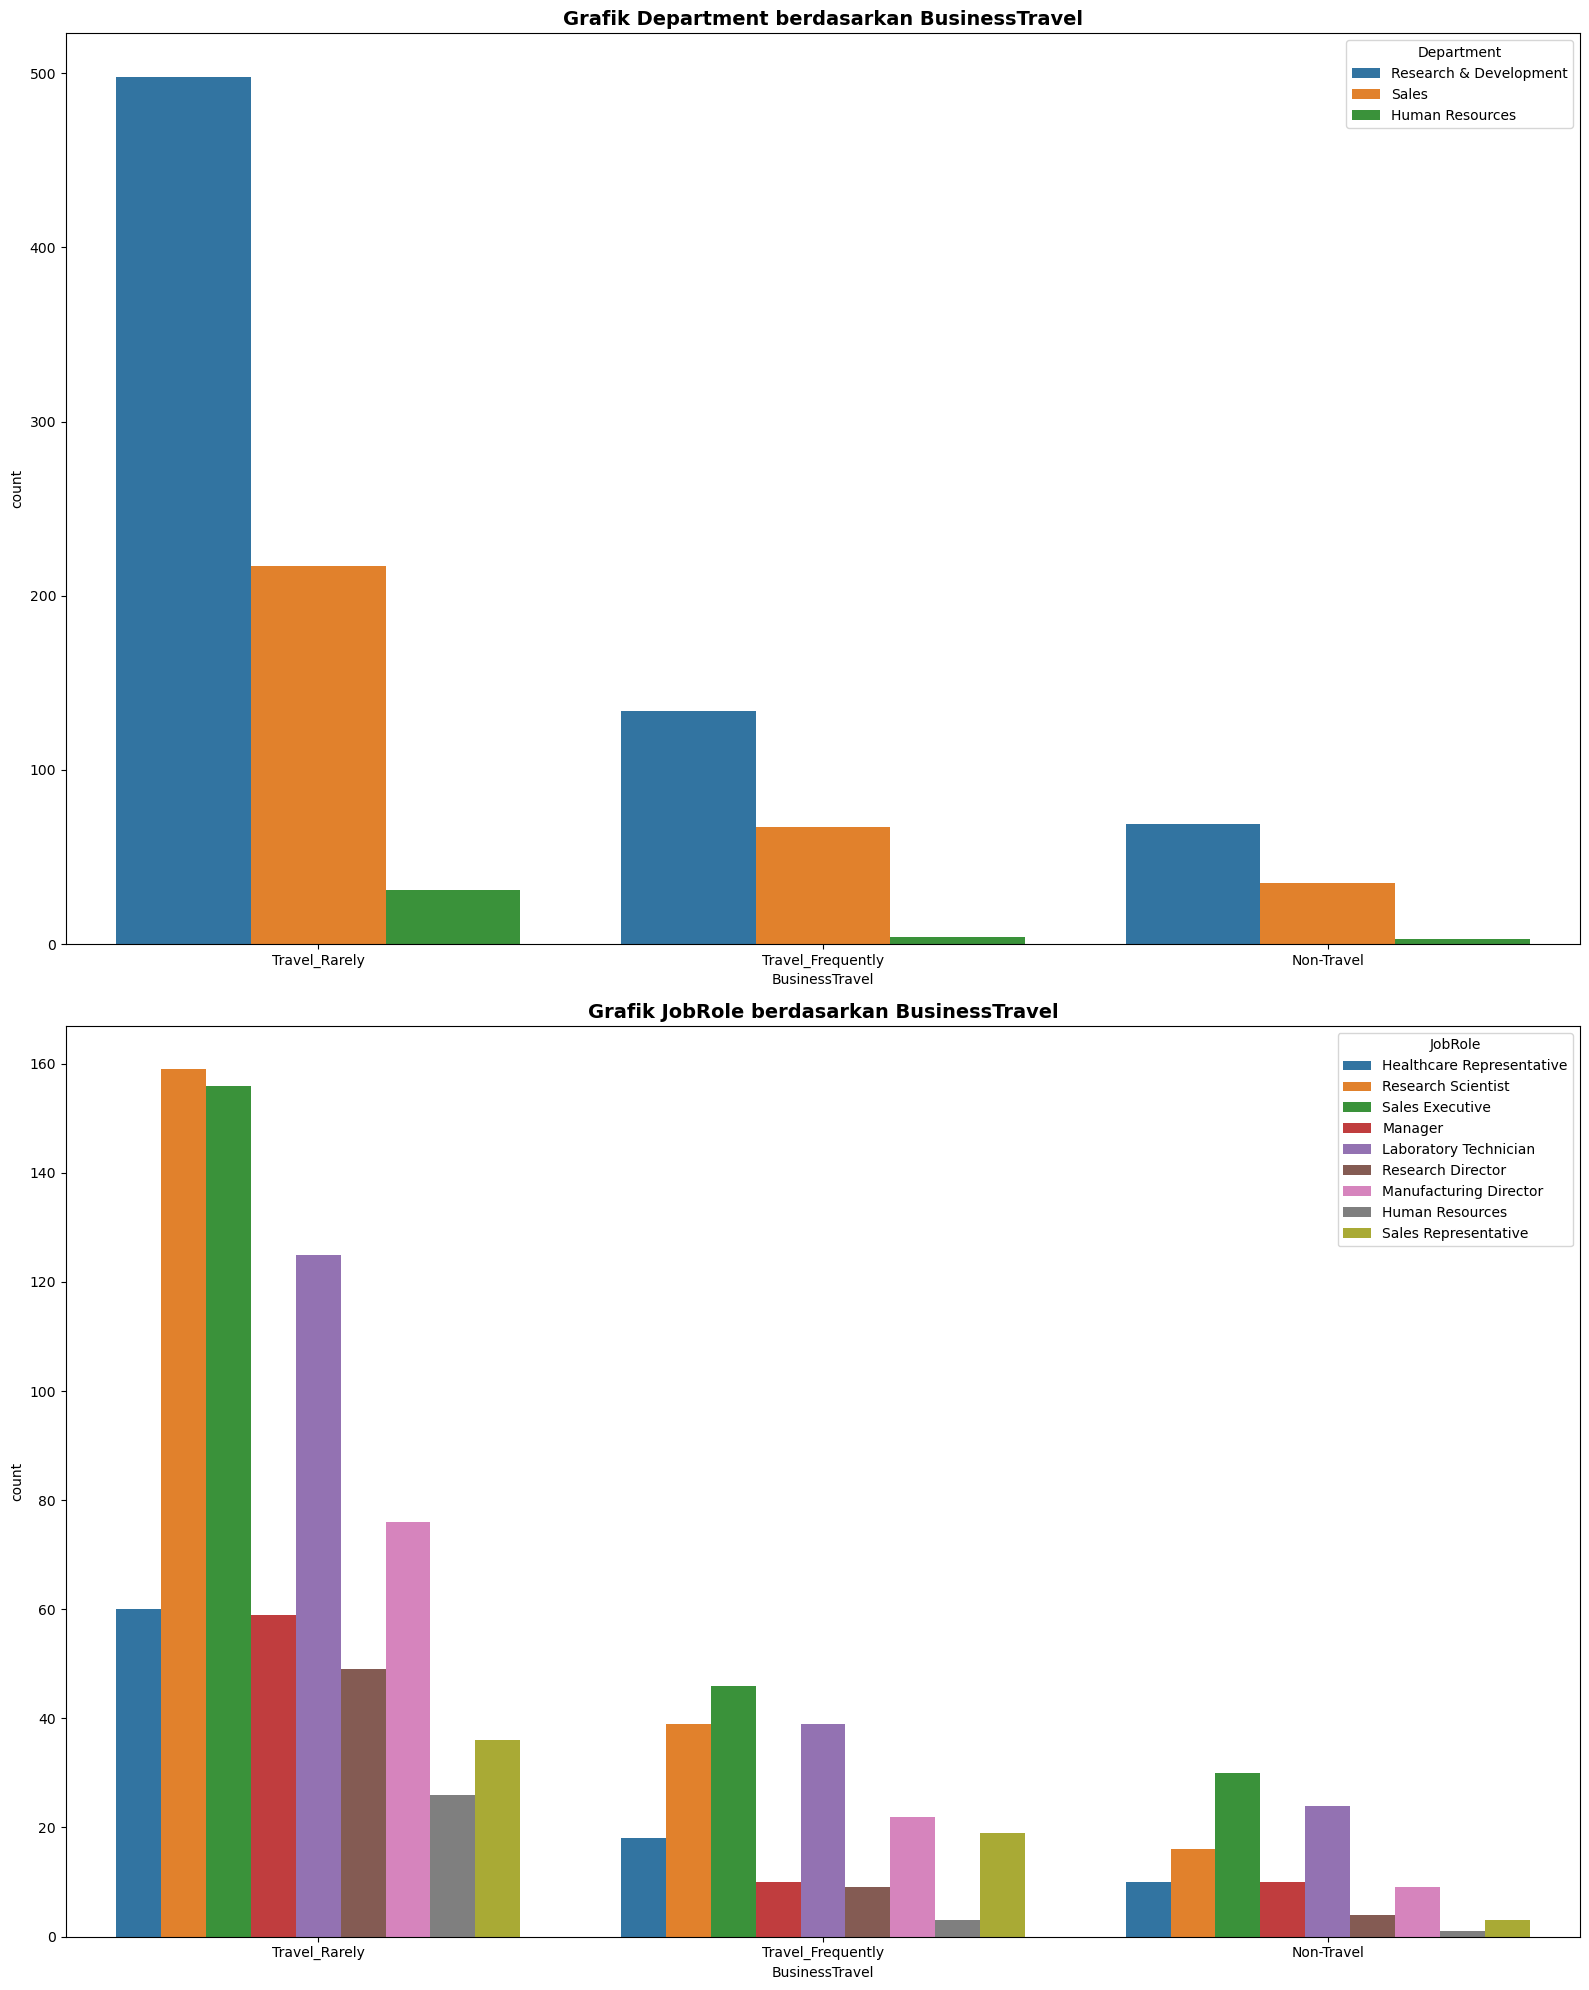

In [19]:
categorical_plot(
    features=["Department", "JobRole"],
    df=df,
    segment_feature="BusinessTravel"
)

**Obervasi:**   
Teks

### Multivariate Analysis

##### Hubungan dari setiap kolom

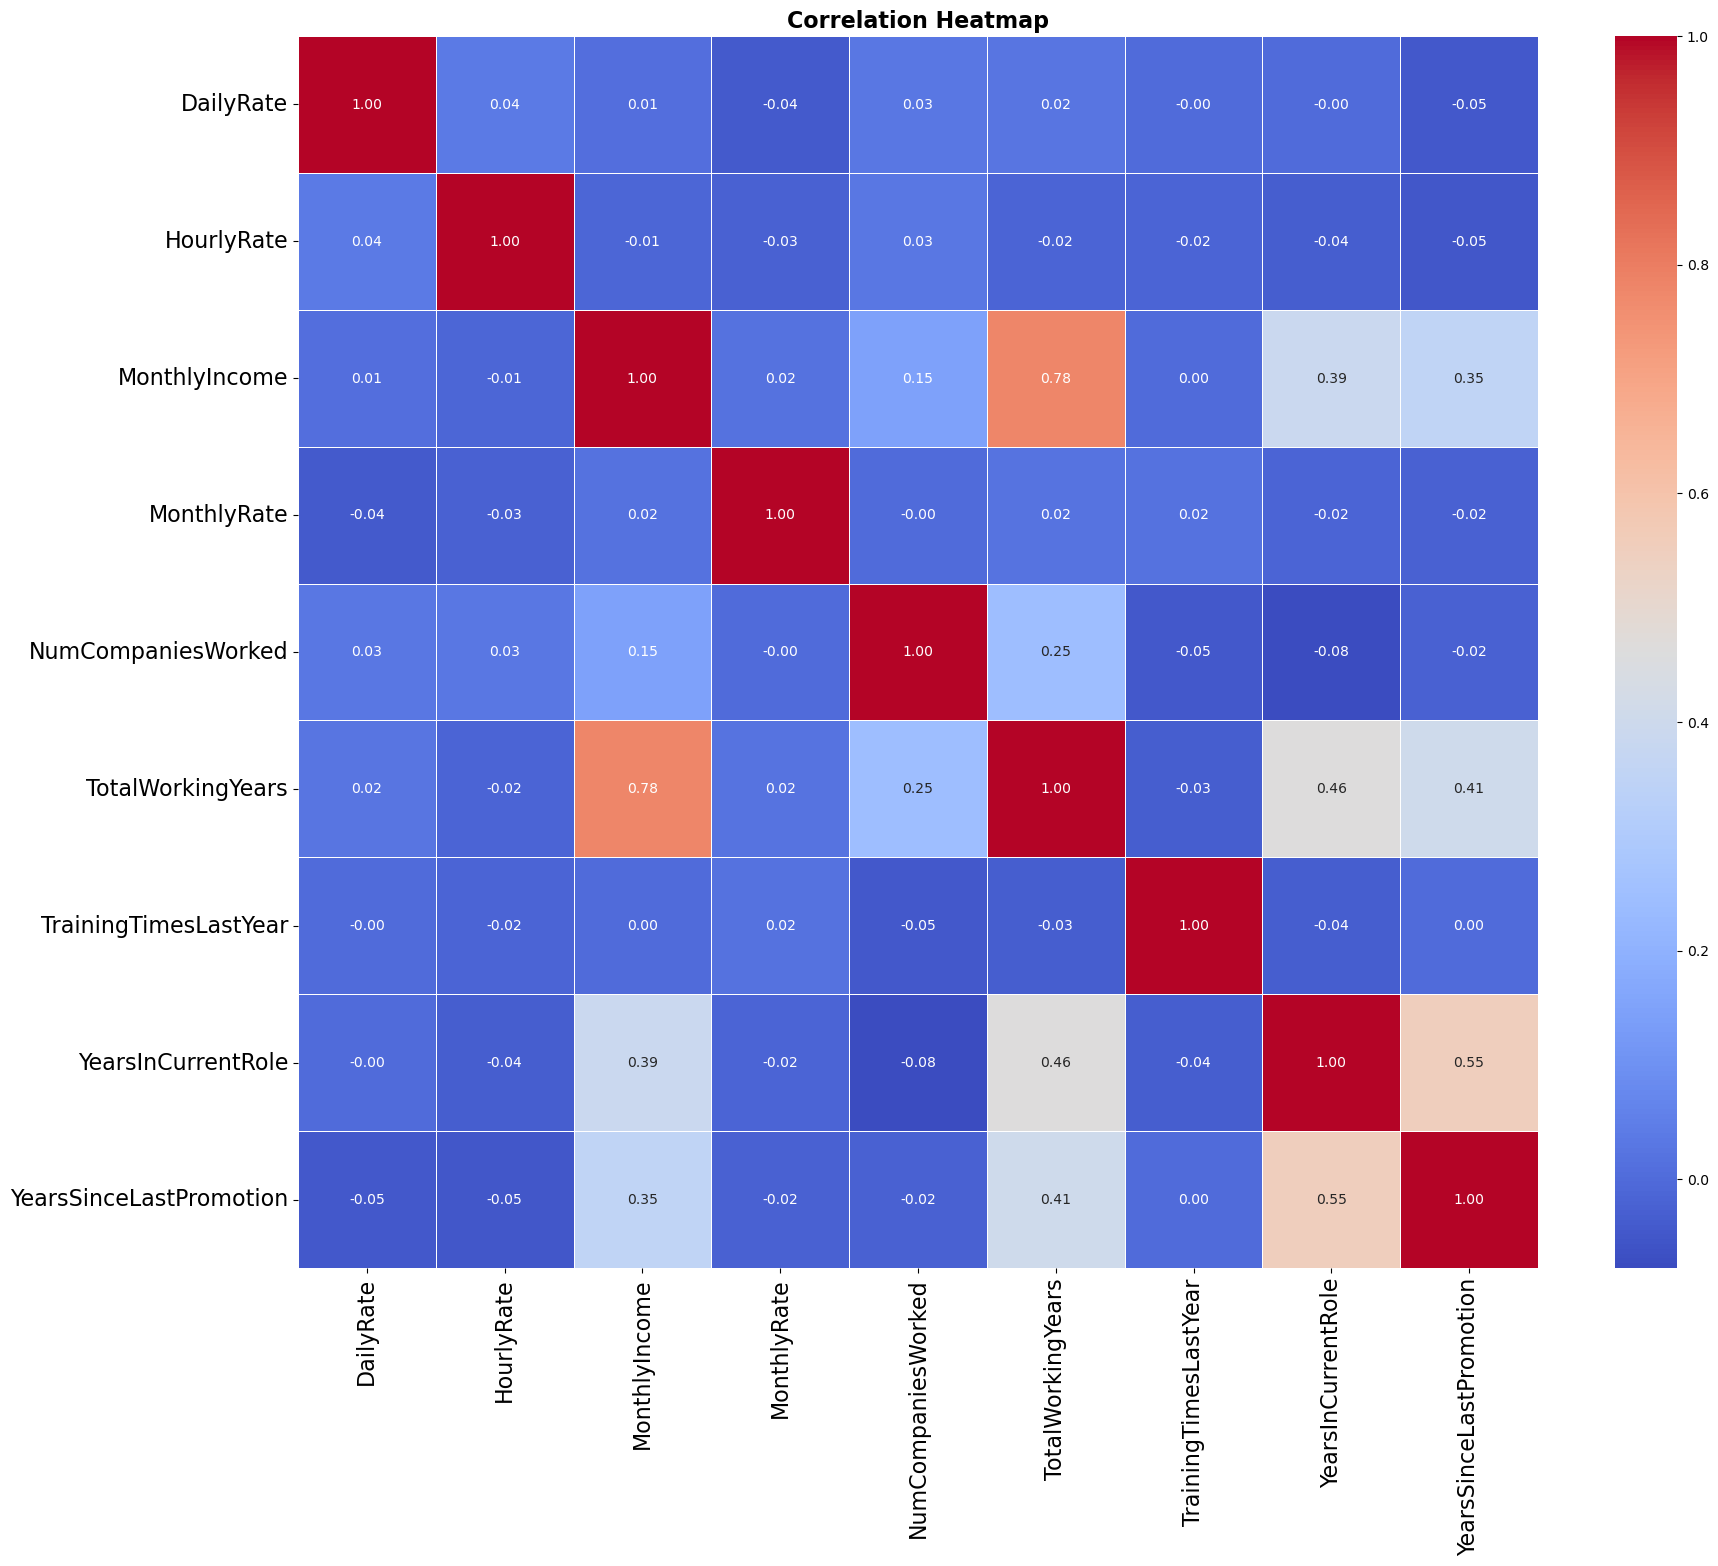

In [20]:
corr = df[num].corr()
plt.figure(figsize=(20, 16))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')
plt.xticks(rotation=90, fontsize=16)
plt.yticks(rotation=0, fontsize=16)
plt.show()

**Obervasi:**   
Teks